<center>
<table>
  <tr>
    <td><img src="http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg" width="100"/> </td>
     <td><img src="https://github.com/astg606/py_materials/blob/master/logos/ASTG_logo.png?raw=true" width="80"/> </td>
     <td> <img src="https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png" width="130"/> </td>
    </tr>
</table>
</center>

        
<center>
<h1><font color= "blue" size="+3">ASTG Python Courses</font></h1>
</center>

---

<center>
    <h1><font color="red">Image Classification with Tensorflow</font></h1>
</center>

## Useful Reference

- [MNIST digits classification with TensorFlow 2](https://github.com/antonio-f/TensorFlow2_digits_classification-Linear_Classifier-MLP/blob/master/TensorFlow2_digits_classification-Linear_Classifier-MLP/digits_classification.ipynb)
- [Mnist handwritten digit classification using tensorflow](https://milindsoorya.site/blog/handwritten-digits-classification)
- [A real example – recognizing handwritten digits](https://subscription.packtpub.com/book/data/9781838823412/1/ch01lvl1sec08/a-real-example-recognizing-handwritten-digits)
- [DIFFERENCE BETWEEN SOFTMAX FUNCTION AND SIGMOID FUNCTION](https://dataaspirant.com/difference-between-softmax-function-and-sigmoid-function/)

### Load the modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [3]:
print(f"Version of Numpy:      {np.__version__}")
print(f"Version of Pandas:     {pd.__version__}")
print(f"Version of Keras:      {tf.keras.__version__}")
print(f"Version of TensorFlow: {tf.__version__}")

Version of Numpy:      1.23.2
Version of Pandas:     1.3.4
Version of Keras:      2.6.0
Version of TensorFlow: 2.6.0


# <font color="red">Image Classification</font> 

We use the [MNIST data set](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology database).

* Is a large database of handwritten digits that is commonly used for training various image processing systems.
* The database is also widely used for training and testing in the field of machine learning.
* The dataset we will be using contains 70000 images of handwritten digits among which 10000 are reserved for testing.
* It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

![TSF](https://static.javatpoint.com/tutorial/tensorflow/images/mnist-dataset-in-cnn.jpg)
Image Source: [https://www.javatpoint.com/tensorflow-mnist-dataset-in-cnn](https://www.javatpoint.com/tensorflow-mnist-dataset-in-cnn)

## <font color="blue"> Load MNiST Dataset</font>

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
print("Shape train inputs:  ", x_train.shape)
print("Shape train outputs: ", y_train.shape)
print("Shape test  inputs:  ", x_test.shape)
print("Shape test  outputs: ", y_test.shape)

Shape train inputs:   (60000, 28, 28)
Shape train outputs:  (60000,)
Shape test  inputs:   (10000, 28, 28)
Shape test  outputs:  (10000,)


In [6]:
# Save image parameters to the constants that we will use later 
# for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
print(f'IMAGE_WIDTH:  {IMAGE_WIDTH}')
print(f'IMAGE_HEIGHT: {IMAGE_HEIGHT}')

IMAGE_WIDTH:  28
IMAGE_HEIGHT: 28


In [7]:
print("Type train inputs:  ", x_train.dtype)
print("Type train outputs: ", y_train.dtype)
print("Type test  inputs:  ", x_test.dtype)
print("Type test  outputs: ", y_test.dtype)

Type train inputs:   uint8
Type train outputs:  uint8
Type test  inputs:   uint8
Type test  outputs:  uint8


In [8]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:
np.unique(x_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Check an arbitrary image

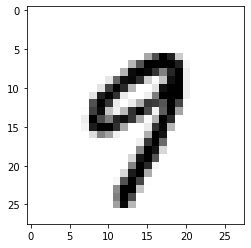

In [13]:
some_index = 15657
some_digit = x_train[some_index]
some_digit_image = some_digit.reshape(IMAGE_WIDTH, IMAGE_HEIGHT)

plt.imshow(some_digit_image, 
           cmap = matplotlib.cm.binary, 
           interpolation='nearest')
plt.axis=('off')

In [14]:
print(y_train[some_index])

9


## <font color="blue"> Preprocess the Training and Test Datasets</font>

#### Change the data type

- Change the type from integer to floating point. 
- This will reduce our memory requirements by forcing the precision of the pixel values to be 32 bit, the default precision used by `Keras` anyway.

In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [16]:
print(f"Train --> min = {np.min(x_train)} max = {np.max(x_train)}")
print(f"Test  --> min = {np.min(x_test)} max = {np.max(x_test)}")

Train --> min = 0.0 max = 255.0
Test  --> min = 0.0 max = 255.0


#### Normalize the data
- The values are from 0.0 to 255.0.
- We want to have values between 0.0 and 1.0.
- Normalizing the data generally speeds up trainning and leads to faster convergence.

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [18]:
print(f"Train --> min = {np.min(x_train)} max = {np.max(x_train)}")
print(f"Test  --> min = {np.min(x_test)} max = {np.max(x_test)}")

Train --> min = 0.0 max = 1.0
Test  --> min = 0.0 max = 1.0


#### Reshape the data

- The training and test datasets are structured as a 3-dimensional array of instance, image width and image height. 
- For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the `IMAGE_WIDTH*IMAGE_HEIGHT` sized images will be 784 pixel input values.
- We can do this transform easily using the `reshape()` function on the NumPy array.

In [20]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test:  {x_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of x_test:  (10000, 28, 28)


In [19]:
x_train_reshape = x_train.reshape(x_train.shape[0], 
                                  IMAGE_WIDTH*IMAGE_HEIGHT)
x_test_reshape = x_test.reshape(x_test.shape[0], 
                                IMAGE_WIDTH*IMAGE_HEIGHT)

In [21]:
print(f"Shape of x_train_reshape: {x_train_reshape.shape}")
print(f"Shape of x_test_reshape:  {x_test_reshape.shape}")

Shape of x_train_reshape: (60000, 784)
Shape of x_test_reshape:  (10000, 784)


#### Convert class vectors to binary class matrices

- The targets have 10 possible integer values: `0, 1, 2, ..., 9`.
- We use the `to_categorical` function to convert integer targets into categorical.
  - For instance, `2` would become `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]` (it’s zero-indexed).
- We do it because `Keras` will expect the training targets to be 10-dimensional vectors, since there will be 10 nodes in the output layer.

In [22]:
num_classes = 10
y_train_convert = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_convert = tf.keras.utils.to_categorical(y_test, num_classes)

In [23]:
print(y_train_convert[some_index])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## <font color="blue"> Model 1: Simple Sequential Model</font>

Architecture of the Network is:

1. Input layer for `IMAGE_WIDTH*IMAGE_HEIGHT = 28x28 = 784` images in MNiST dataset
2. Dense layer with 128 neurons and ReLU activation function
3. Output layer with 10 neurons for classification of input images as one of ten digits (0 to 9)

#### Remarks
- We add a regularization `Dropout` layer to randomly exclude a portion of the neurons (here 20%) in the layer in order to reduce overfitting.
- A `softmax` activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction.
  - Converts the result into a probability distribution.
  - Calculates probabilities of each target class over all possible target classes
  - The values of the output vector are in range (0, 1) and sum to 1. 
  - `softmax` of input `x` is calculated by function `exp(x)/tf.reduce_sum(exp(x))`.

In [24]:
one_layer_model = tf.keras.models.Sequential()
one_layer_model.add(tf.keras.layers.Dense(
    128, 
    activation='relu', 
    input_shape=(IMAGE_WIDTH*IMAGE_HEIGHT,)))
one_layer_model.add(tf.keras.layers.Dropout(0.2))
one_layer_model.add(tf.keras.layers.Dense(10, activation='softmax'))

2022-11-07 18:12:14.416531: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
one_layer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
#tf.keras.utils.plot_model(
#    one_layer_model,
#    show_shapes=True,
#    show_layer_names=True,
#)

### <font color="red">Compile the Model</font>

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer This is how the model is updated based on the data it sees and its loss function.
- Metrics Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

![MLP](https://m0nads.files.wordpress.com/2021/01/linear_classifier.png)
Image Source: m0nads.wordpress.com

In [27]:
one_layer_model.compile(loss='categorical_crossentropy',
                        optimizer=tf.keras.optimizers.RMSprop(),
                        metrics=['accuracy'])

### <font color="red"> Training and Validation</font>

The `one_layer_model.fit` method adjusts the model parameters to minimize the loss:

In [28]:
num_epochs = 10
batch_size = 16

In [29]:
one_layer_history = one_layer_model.fit(
    x_train_reshape, 
    y_train_convert,
    batch_size = batch_size,
    epochs = num_epochs,
    verbose = 1, 
    validation_data = (x_test_reshape, y_test_convert))

2022-11-07 18:13:17.223176: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.2770 - accuracy: 0.9195 - val_loss: 0.1386 - val_accuracy: 0.9615
Epoch 2/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1578 - accuracy: 0.9560 - val_loss: 0.1240 - val_accuracy: 0.9660
Epoch 3/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1401 - accuracy: 0.9645 - val_loss: 0.1151 - val_accuracy: 0.9728
Epoch 4/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1265 - accuracy: 0.9694 - val_loss: 0.1121 - val_accuracy: 0.9748
Epoch 5/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1222 - accuracy: 0.9713 - val_loss: 0.1266 - val_accuracy: 0.9741
Epoch 6/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1170 - accuracy: 0.9725 - val_loss: 0.1166 - val_accuracy: 0.9752
Epoch 7/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1166 - accuracy: 0.9747 - val_loss: 0.1186 - val_accuracy:

### <font color="red"> Plot the Deceasing Loss over Epochs</font>

Use Pandas to plot a graph showing the decrease in mean squared error (mse) as training improves the model.

In [30]:
hist_df = pd.DataFrame(one_layer_history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.276959,0.919500,0.138583,0.9615
1,0.157808,0.956000,0.123986,0.9660
2,0.140078,0.964483,0.115107,0.9728
3,0.126458,0.969450,0.112079,0.9748
4,0.122156,0.971333,0.126572,0.9741
5,0.116955,0.972550,0.116580,0.9752
6,0.116643,0.974700,0.118605,0.9747
7,0.113176,0.976400,0.128830,0.9757
8,0.109195,0.976067,0.135472,0.9762
9,0.109559,0.977467,0.126870,0.9765


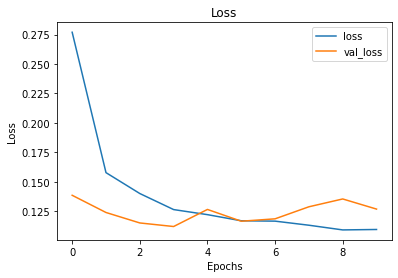

In [31]:
hist_df[['loss', 'val_loss']].plot(xlabel='Epochs', 
                                   ylabel='Loss', 
                                   title='Loss');

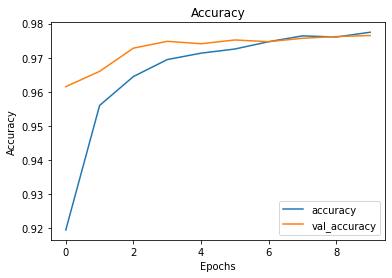

In [32]:
hist_df[['accuracy', 'val_accuracy']].plot(xlabel='Epochs', 
                                   ylabel='Accuracy', 
                                   title='Accuracy');

### <font color="red"> Evaluate the Model</font>

The `mnist_model.evaluate` method checks the models performance, usually on a "Validation-set" or "Test-set".

In [33]:
score = one_layer_model.evaluate(x_test_reshape,  
                                 y_test_convert, 
                                 verbose=0)
print(f'Test loss:     {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss:     0.12687000632286072
Test accuracy: 0.9764999747276306


### <font color="red"> Visualize Predictions</font>

In [34]:
def display_digits(X, y):
    """
      Given an array of images of digits X and 
      the corresponding values of the digit y,
      this function plots the first 96 images and their values.
    """
    # Figure size (width, height) in inches
    fig = plt.figure(figsize=(8, 6))

    # Adjust the subplots 
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(96):
        # Initialize the subplots: 
        #    Add a subplot in the grid of 8 by 12, at the i+1-th position
        ax = fig.add_subplot(8, 12, i + 1, xticks=[], yticks=[])
        
        # Display an image at the i-th position
        ax.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')
       
        # label the image with the target value
        ax.text(0, 7, str(y[i]))

    # Show the plot
    plt.show()

In [35]:
probabilities = one_layer_model.predict(x_test_reshape, steps=1)

In [36]:
probabilities.shape

(10000, 10)

In [37]:
probabilities[0]

array([8.3957103e-28, 4.9881738e-32, 3.1000212e-22, 2.9714861e-14,
       1.2595857e-35, 5.9434251e-19, 0.0000000e+00, 1.0000000e+00,
       1.7650515e-23, 5.9741114e-19], dtype=float32)

We use the `numpy.argmax` function to return the indices of the maximum values along an axis.

In [38]:
one_layer_predicted_labels = np.argmax(probabilities, axis=1)

In [39]:
one_layer_predicted_labels[0]

7

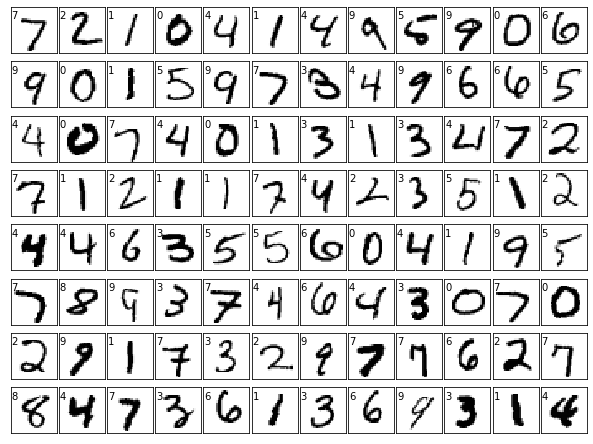

In [41]:
display_digits(x_test_reshape, one_layer_predicted_labels)

### <font color="red">Confusion Matrix for Validation</font>

- We can use the confusion matrix to have a picture of our prediction.
- A number `n` in a cell means that we predicted the value in the truth row as the value in the predicted column, `n` times. 
- All the diagonal elements are correct predictions.
- In the example below, the black cells, value shows the wrong predictions. 

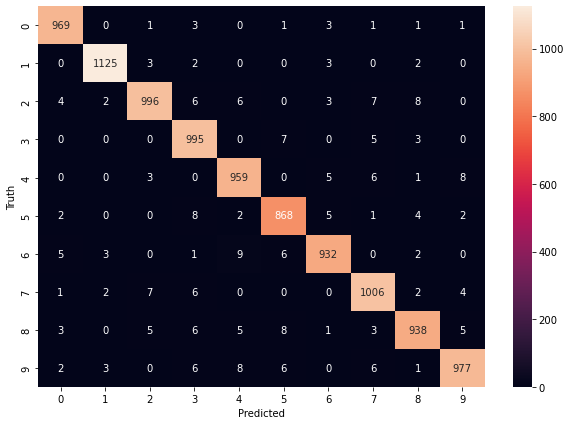

In [42]:
cm = tf.math.confusion_matrix(labels=y_test, 
                              predictions=one_layer_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d');
plt.xlabel('Predicted');
plt.ylabel('Truth');

In [43]:
def determine_accuracy(cmatrix):
    cm_values = cmatrix.numpy()
    l = cm_values.shape[0]
    diag = [cm_values[i, i] for i in range(l)]
    
    pds = pd.Series(y_test)

    org_total = pds.value_counts().sort_index()
    org_percent = (pds.value_counts()/pds.count()).sort_values().sort_index()*100
    pred_accu = (pd.Series(diag)/org_total)*100
    idx = ['zero', 'one', 'two', 'three', 'four',
          'five', 'six', 'seven', 'eight', 'nine']

    keys = ['Original Total', 'Predicted Total', 'Predicted Accuracy']
    accu_data = pd.concat([org_total, pd.Series(diag), pred_accu], 
                             axis=1, keys=keys)

    accu_data.index = idx
    return accu_data

In [44]:
accuracy_data = determine_accuracy(cm)
accuracy_data

,Original Total,Predicted Total,Predicted Accuracy
zero,980,969,98.877551
one,1135,1125,99.118943
two,1032,996,96.511628
three,1010,995,98.514851
four,982,959,97.657841
five,892,868,97.309417
six,958,932,97.286013
seven,1028,1006,97.859922
eight,974,938,96.303901
nine,1009,977,96.828543


### <font color="red">Save the Model</font>

In [ ]:
one_layer_model.save('one_layer_model')

Then to reload the model later, we can use this:

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('one_layer_model')

## <font color="blue"> Model 2: Add a Hidden Layer</font>

In [45]:
two_layer_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMAGE_WIDTH*IMAGE_HEIGHT, )),
    tf.keras.layers.Dense(256, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(256, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10)])

In [46]:
two_layer_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [47]:
two_layer_model.compile(optimizer='adam',
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                           metrics=['accuracy'])

In [48]:
two_layer_history = two_layer_model.fit(
    x_train_reshape, 
    y_train, 
    batch_size = batch_size,
    epochs=num_epochs)

Epoch 1/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3134 - accuracy: 0.9074
Epoch 2/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1240 - accuracy: 0.9625
Epoch 3/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0804 - accuracy: 0.9750
Epoch 4/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0578 - accuracy: 0.9818
Epoch 5/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0418 - accuracy: 0.9868
Epoch 6/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0322 - accuracy: 0.9896
Epoch 7/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0233 - accuracy: 0.9923
Epoch 8/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0190 - accuracy: 0.9939
Epoch 9/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0161 - accuracy: 0.9945
Epoch 10/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.011

In [49]:
hist_df = pd.DataFrame(two_layer_history.history)
hist_df

,loss,accuracy
0,0.313370,0.907383
1,0.123959,0.962550
2,0.080389,0.974983
3,0.057845,0.981767
4,0.041792,0.986783
5,0.032169,0.989600
6,0.023296,0.992267
7,0.018971,0.993867
8,0.016125,0.994533
9,0.011580,0.996283


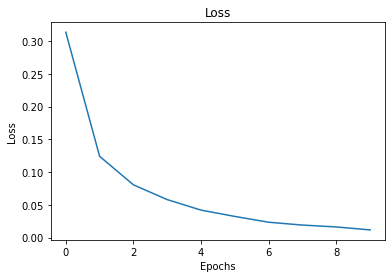

In [50]:
hist_df['loss'].plot(xlabel='Epochs', 
                     ylabel='Loss', 
                     title='Loss');

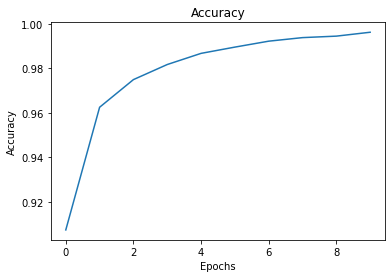

In [51]:
hist_df['accuracy'].plot(xlabel='Epochs', 
                     ylabel='Accuracy', 
                     title='Accuracy');

In [52]:
score = two_layer_model.evaluate(x_test_reshape,  
                                 y_test, 
                                 verbose=0)
print(f'Test loss:     {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss:     0.09964160621166229
Test accuracy: 0.9768999814987183


In [53]:
predictions = two_layer_model.predict(x_test_reshape)
two_layer_predicted_labels = np.argmax(predictions, axis=1)

In [54]:
print(y_test[:10])
print(two_layer_predicted_labels[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


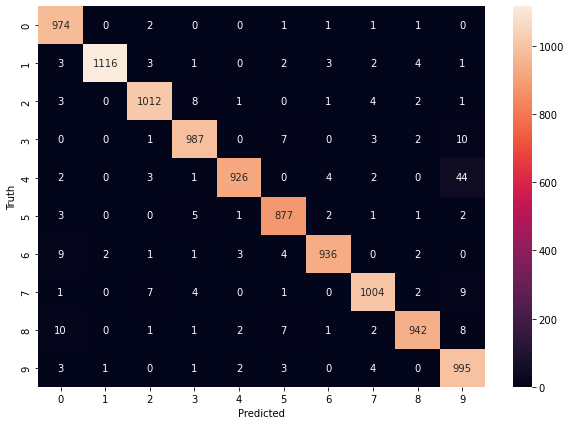

In [55]:
cm = tf.math.confusion_matrix(labels=y_test, 
                              predictions=two_layer_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d');
plt.xlabel('Predicted');
plt.ylabel('Truth');

In [56]:
accuracy_data = determine_accuracy(cm)
accuracy_data

,Original Total,Predicted Total,Predicted Accuracy
zero,980,974,99.387755
one,1135,1116,98.325991
two,1032,1012,98.062016
three,1010,987,97.722772
four,982,926,94.297352
five,892,877,98.318386
six,958,936,97.703549
seven,1028,1004,97.665370
eight,974,942,96.714579
nine,1009,995,98.612488
